In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
!gdown --id 1r8I3uTY_saIyc5fWdjLHoBODe3giAkO1

Downloading...
From: https://drive.google.com/uc?id=1r8I3uTY_saIyc5fWdjLHoBODe3giAkO1
To: /content/aqi_data.csv
100% 17.5M/17.5M [00:00<00:00, 107MB/s]


In [59]:
aqi_data=pd.read_csv('aqi_data.csv')

In [60]:
#shape of data
aqi_data.shape

(226896, 11)

In [61]:
#first 5 rows
aqi_data.head(n=5)

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,state,timestamp
0,5,600.82,0.00,5.18,54.36,2.41,168.55,192.95,3.26,andhra_pradesh,2021-01-01 01:00:00
1,5,660.90,0.02,8.05,50.78,3.87,180.32,206.18,2.82,andhra_pradesh,2021-01-01 02:00:00
2,5,707.63,0.26,9.68,62.23,7.99,190.69,217.77,2.19,andhra_pradesh,2021-01-01 03:00:00
3,5,607.49,0.23,5.01,125.89,20.50,180.15,208.91,0.00,andhra_pradesh,2021-01-01 04:00:00
4,5,600.82,0.31,4.46,133.04,17.64,175.06,203.91,0.02,andhra_pradesh,2021-01-01 05:00:00


In [62]:
#removing all _pradesh in state names to make easier visualizations
def change_state_name(name):
  if '_pradesh' in name:
    name=name.split('_')[0]
  return name
aqi_data['state']=aqi_data['state'].apply(change_state_name)
aqi_data.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,state,timestamp
0,5,600.82,0.00,5.18,54.36,2.41,168.55,192.95,3.26,andhra,2021-01-01 01:00:00
1,5,660.90,0.02,8.05,50.78,3.87,180.32,206.18,2.82,andhra,2021-01-01 02:00:00
2,5,707.63,0.26,9.68,62.23,7.99,190.69,217.77,2.19,andhra,2021-01-01 03:00:00
3,5,607.49,0.23,5.01,125.89,20.50,180.15,208.91,0.00,andhra,2021-01-01 04:00:00
4,5,600.82,0.31,4.46,133.04,17.64,175.06,203.91,0.02,andhra,2021-01-01 05:00:00


In [63]:
#general info about the data
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226896 entries, 0 to 226895
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   aqi        226896 non-null  int64  
 1   co         226896 non-null  float64
 2   no         226896 non-null  float64
 3   no2        226896 non-null  float64
 4   o3         226896 non-null  float64
 5   so2        226896 non-null  float64
 6   pm2_5      226896 non-null  float64
 7   pm10       226896 non-null  float64
 8   nh3        226896 non-null  float64
 9   state      226896 non-null  object 
 10  timestamp  226896 non-null  object 
dtypes: float64(8), int64(1), object(2)
memory usage: 19.0+ MB


In [64]:
#statistical description of the data
aqi_data.describe()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,226896.000000,226896.000000,226896.000000,226896.000000,226896.000000,226896.000000,226896.000000,226896.000000,226896.000000
mean,3.239678,496.132844,0.553802,7.690159,56.817767,6.007306,47.917114,59.252618,8.301057
std,1.611706,361.426513,2.556830,10.403133,45.507134,14.101595,59.722911,69.925528,14.663582
min,1.000000,131.850000,0.000000,0.030000,0.000000,0.010000,0.500000,0.510000,0.000000
25%,2.000000,283.720000,0.000000,1.590000,22.350000,0.750000,9.780000,11.930000,1.330000
50%,4.000000,387.190000,0.020000,3.940000,44.700000,2.180000,28.615000,36.560000,3.330000
75%,5.000000,560.760000,0.170000,9.430000,83.680000,5.960000,62.610000,80.010000,8.870000
max,5.000000,4486.080000,137.690000,127.490000,474.930000,431.060000,741.450000,802.790000,275.610000


In [65]:
#checking for null values
aqi_data.isna().sum()

aqi          0
co           0
no           0
no2          0
o3           0
so2          0
pm2_5        0
pm10         0
nh3          0
state        0
timestamp    0
dtype: int64

In [66]:
aqi_data.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,state,timestamp
0,5,600.82,0.00,5.18,54.36,2.41,168.55,192.95,3.26,andhra,2021-01-01 01:00:00
1,5,660.90,0.02,8.05,50.78,3.87,180.32,206.18,2.82,andhra,2021-01-01 02:00:00
2,5,707.63,0.26,9.68,62.23,7.99,190.69,217.77,2.19,andhra,2021-01-01 03:00:00
3,5,607.49,0.23,5.01,125.89,20.50,180.15,208.91,0.00,andhra,2021-01-01 04:00:00
4,5,600.82,0.31,4.46,133.04,17.64,175.06,203.91,0.02,andhra,2021-01-01 05:00:00


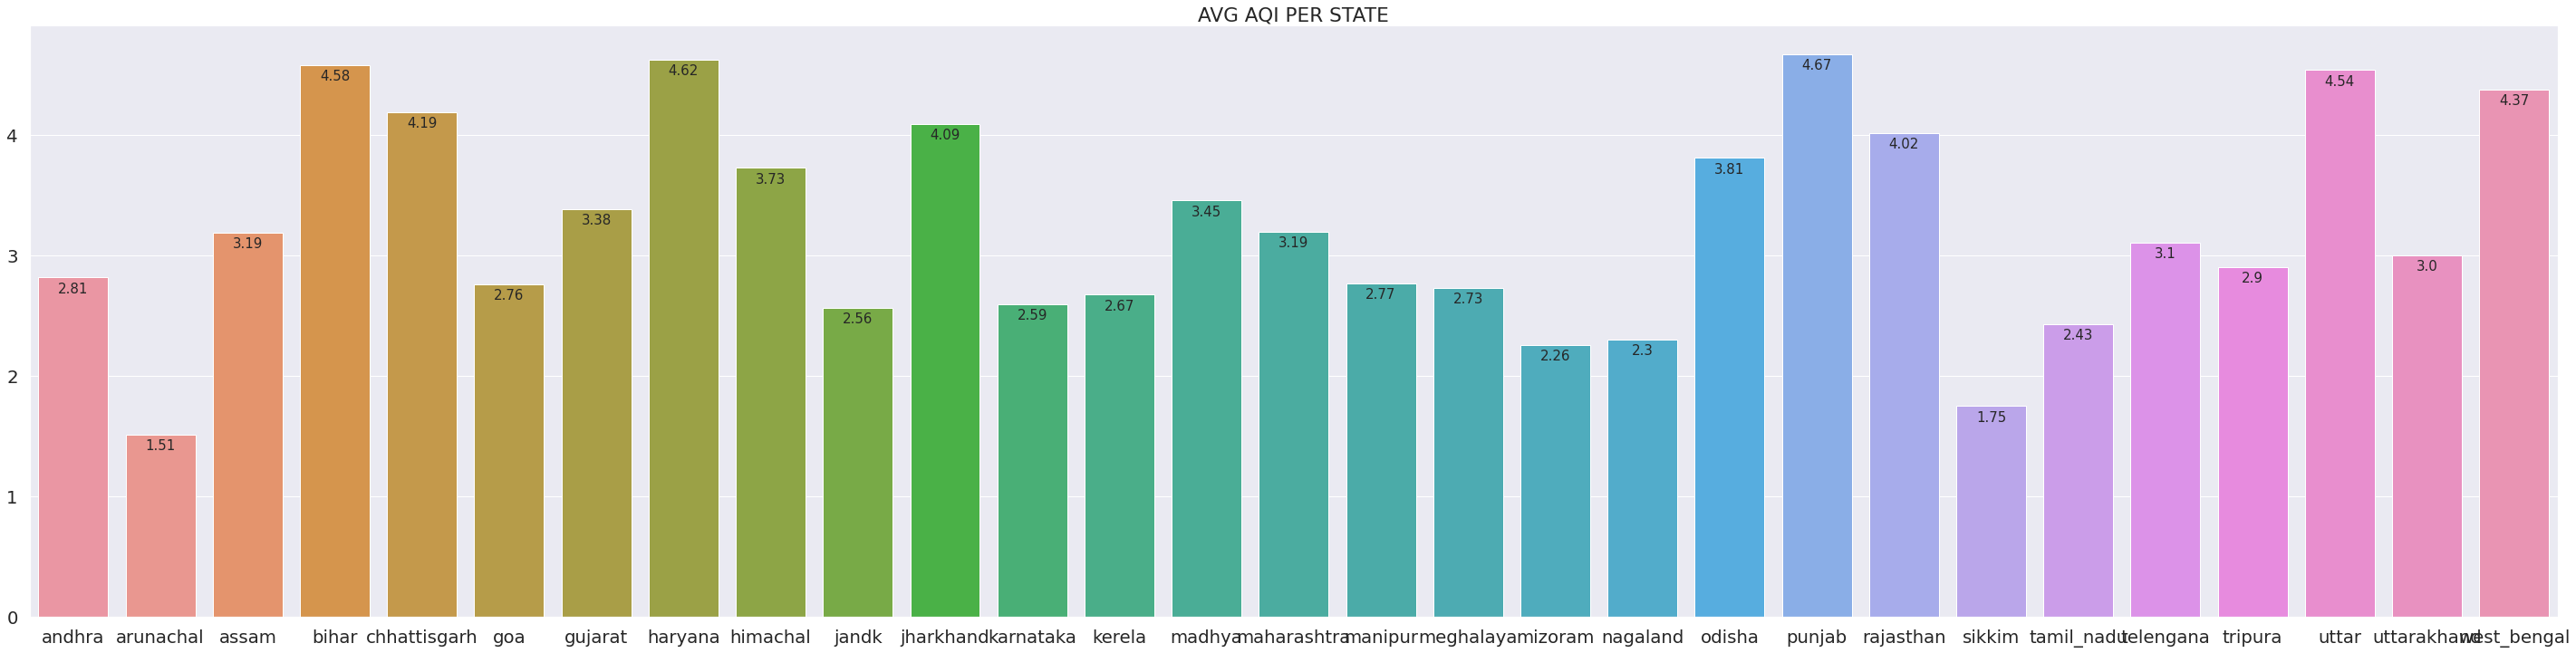

In [67]:
# AVG aqi per state
states=aqi_data.groupby('state')['aqi'].mean().reset_index()['state'].values
avg_aqi=aqi_data.groupby('state')['aqi'].mean().reset_index()['aqi'].values
plt.figure(figsize=(50,12))
sns.set(font_scale = 1.8)
plt.title('AVG AQI PER STATE')
plot=sns.barplot(x=states,y=avg_aqi)
for p in plot.patches:
    plot.annotate(format(round(p.get_height(),ndigits=2)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()


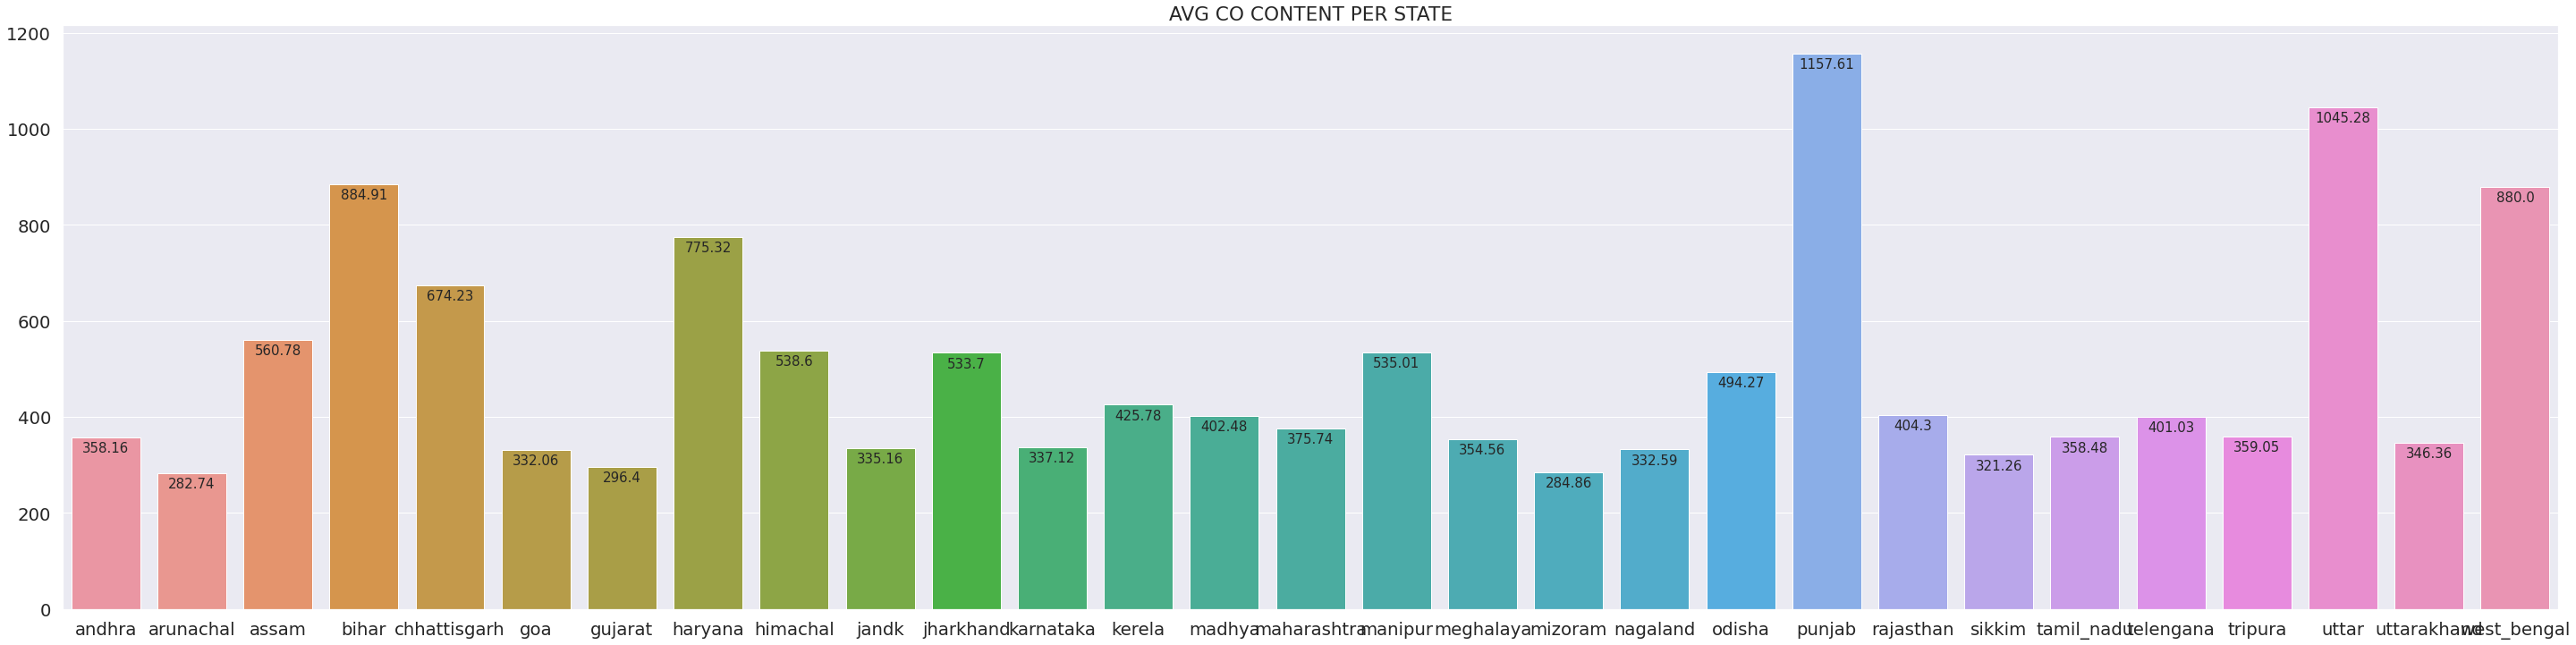

In [68]:
# AVG CO CONTENT PER STATE
# AVG aqi per state
states=aqi_data.groupby('state')['co'].mean().reset_index()['state'].values
avg_aqi=aqi_data.groupby('state')['co'].mean().reset_index()['co'].values
plt.figure(figsize=(50,12))
sns.set(font_scale = 1.8)
plt.title('AVG CO CONTENT PER STATE')
plot=sns.barplot(x=states,y=avg_aqi)
for p in plot.patches:
    plot.annotate(format(round(p.get_height(),ndigits=2)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()


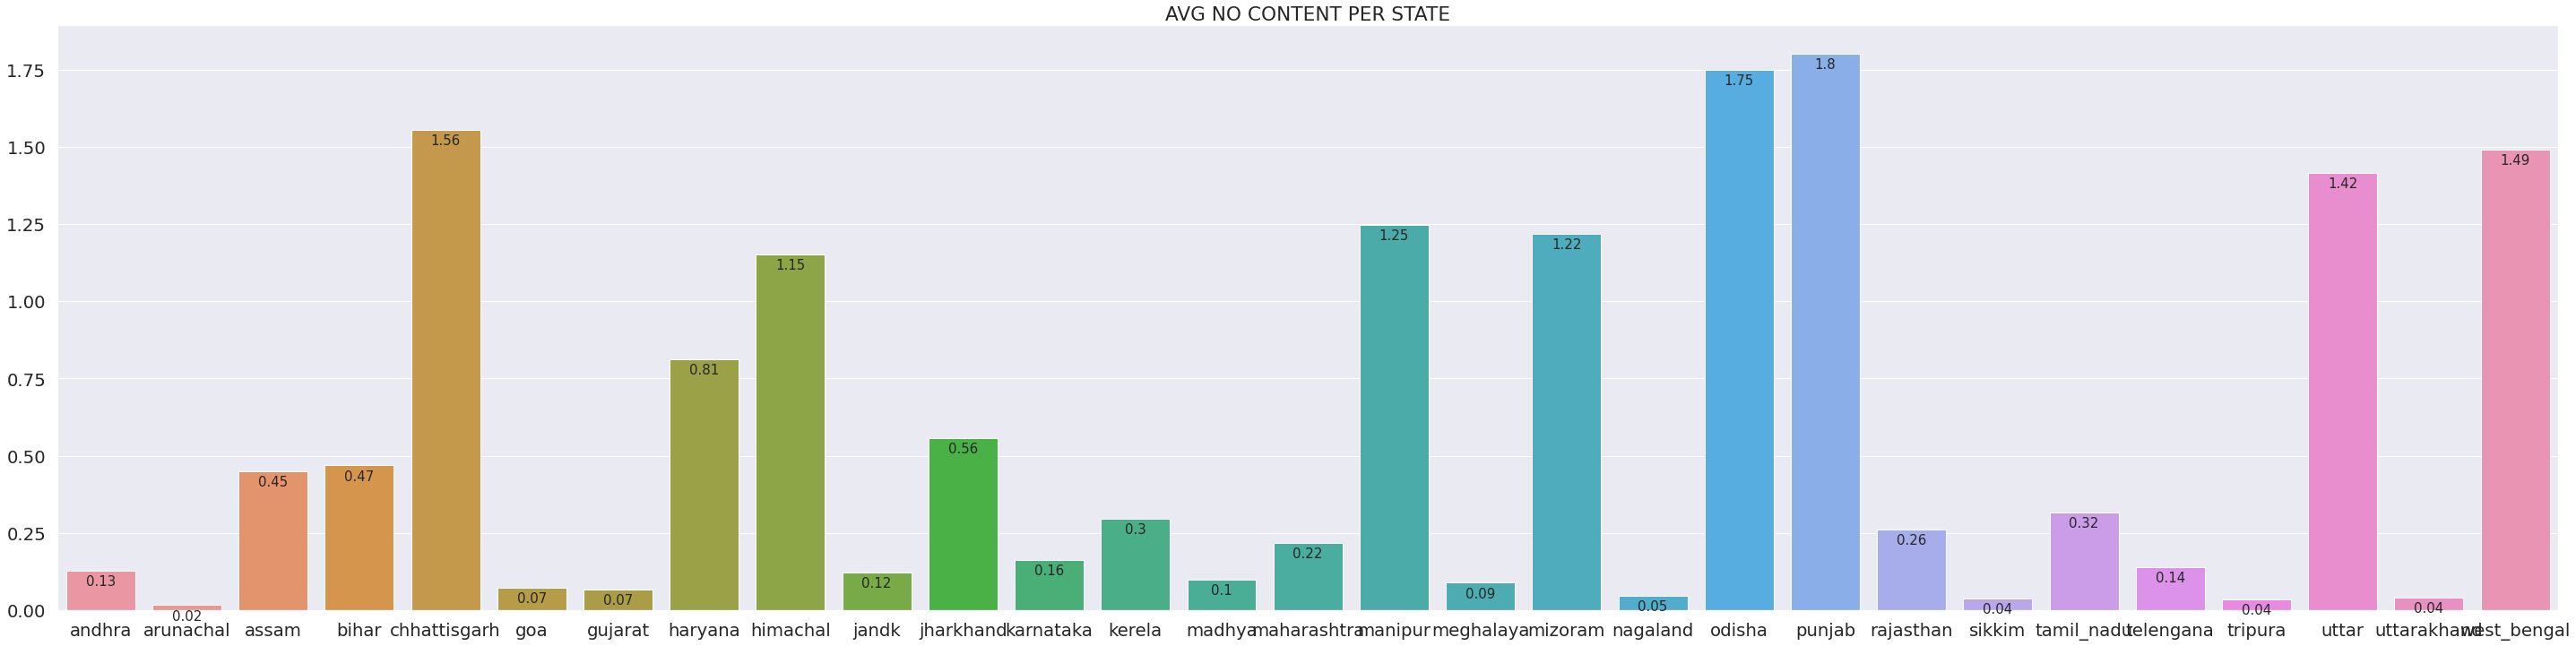

In [69]:
# AVG NO CONTENT PER STATE
# AVG aqi per state
states=aqi_data.groupby('state')['no'].mean().reset_index()['state'].values
avg_aqi=aqi_data.groupby('state')['no'].mean().reset_index()['no'].values
plt.figure(figsize=(50,12))
sns.set(font_scale = 1.8)
plt.title('AVG NO CONTENT PER STATE')
plot=sns.barplot(x=states,y=avg_aqi)
for p in plot.patches:
    plot.annotate(format(round(p.get_height(),ndigits=2)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()


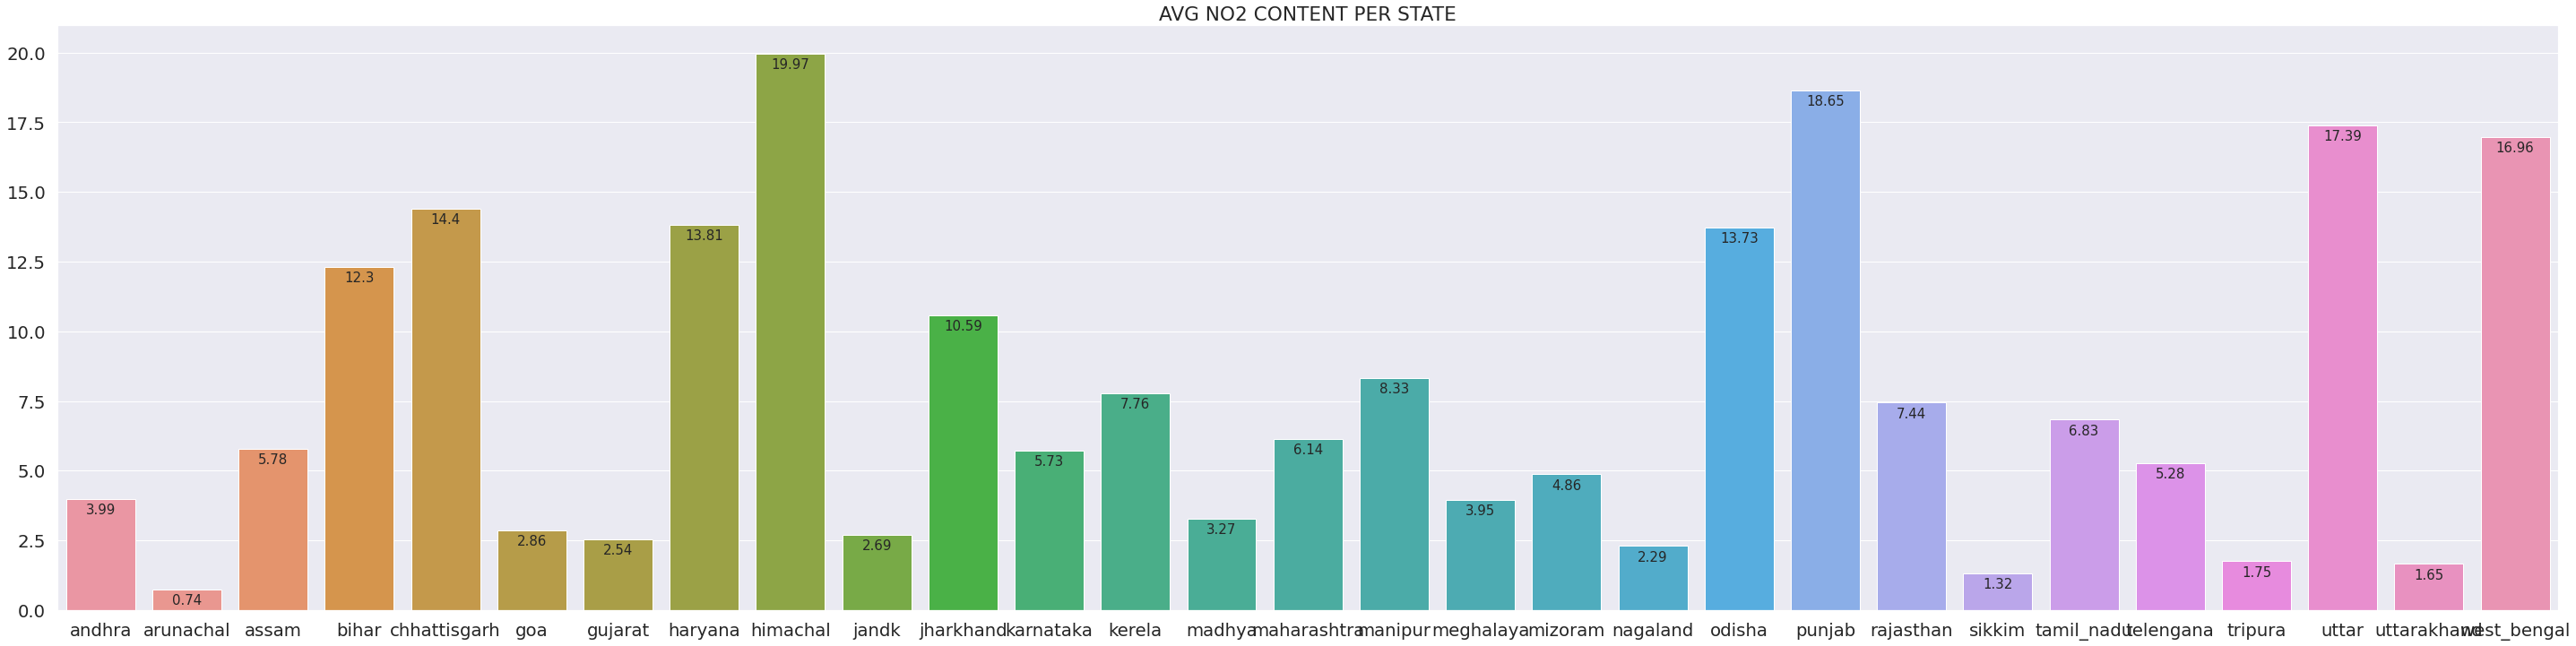

In [70]:
# AVG NO2 CONTENT PER STATE
# AVG aqi per state
states=aqi_data.groupby('state')['no2'].mean().reset_index()['state'].values
avg_aqi=aqi_data.groupby('state')['no2'].mean().reset_index()['no2'].values
plt.figure(figsize=(50,12))
sns.set(font_scale = 1.8)
plt.title('AVG NO2 CONTENT PER STATE')
plot=sns.barplot(x=states,y=avg_aqi)
for p in plot.patches:
    plot.annotate(format(round(p.get_height(),ndigits=2)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()


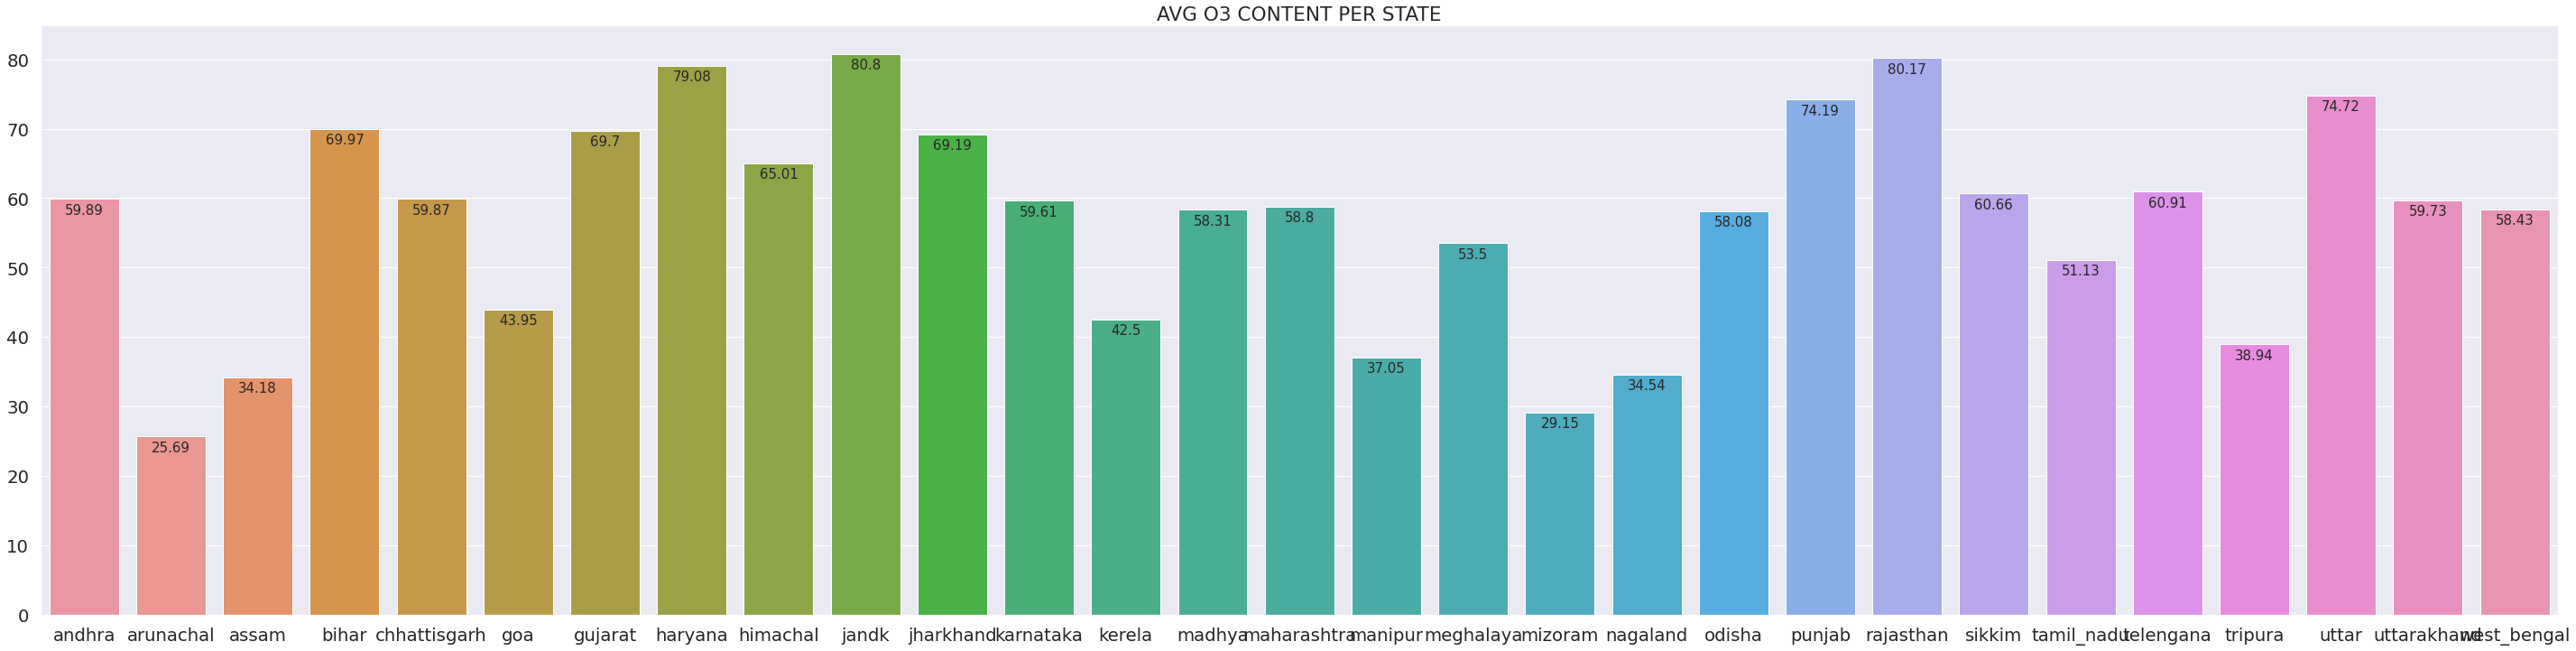

In [71]:
# AVG O3 CONTENT PER STATE
# AVG aqi per state
states=aqi_data.groupby('state')['o3'].mean().reset_index()['state'].values
avg_aqi=aqi_data.groupby('state')['o3'].mean().reset_index()['o3'].values
plt.figure(figsize=(50,12))
sns.set(font_scale = 1.8)
plt.title('AVG O3 CONTENT PER STATE')
plot=sns.barplot(x=states,y=avg_aqi)
for p in plot.patches:
    plot.annotate(format(round(p.get_height(),ndigits=2)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()


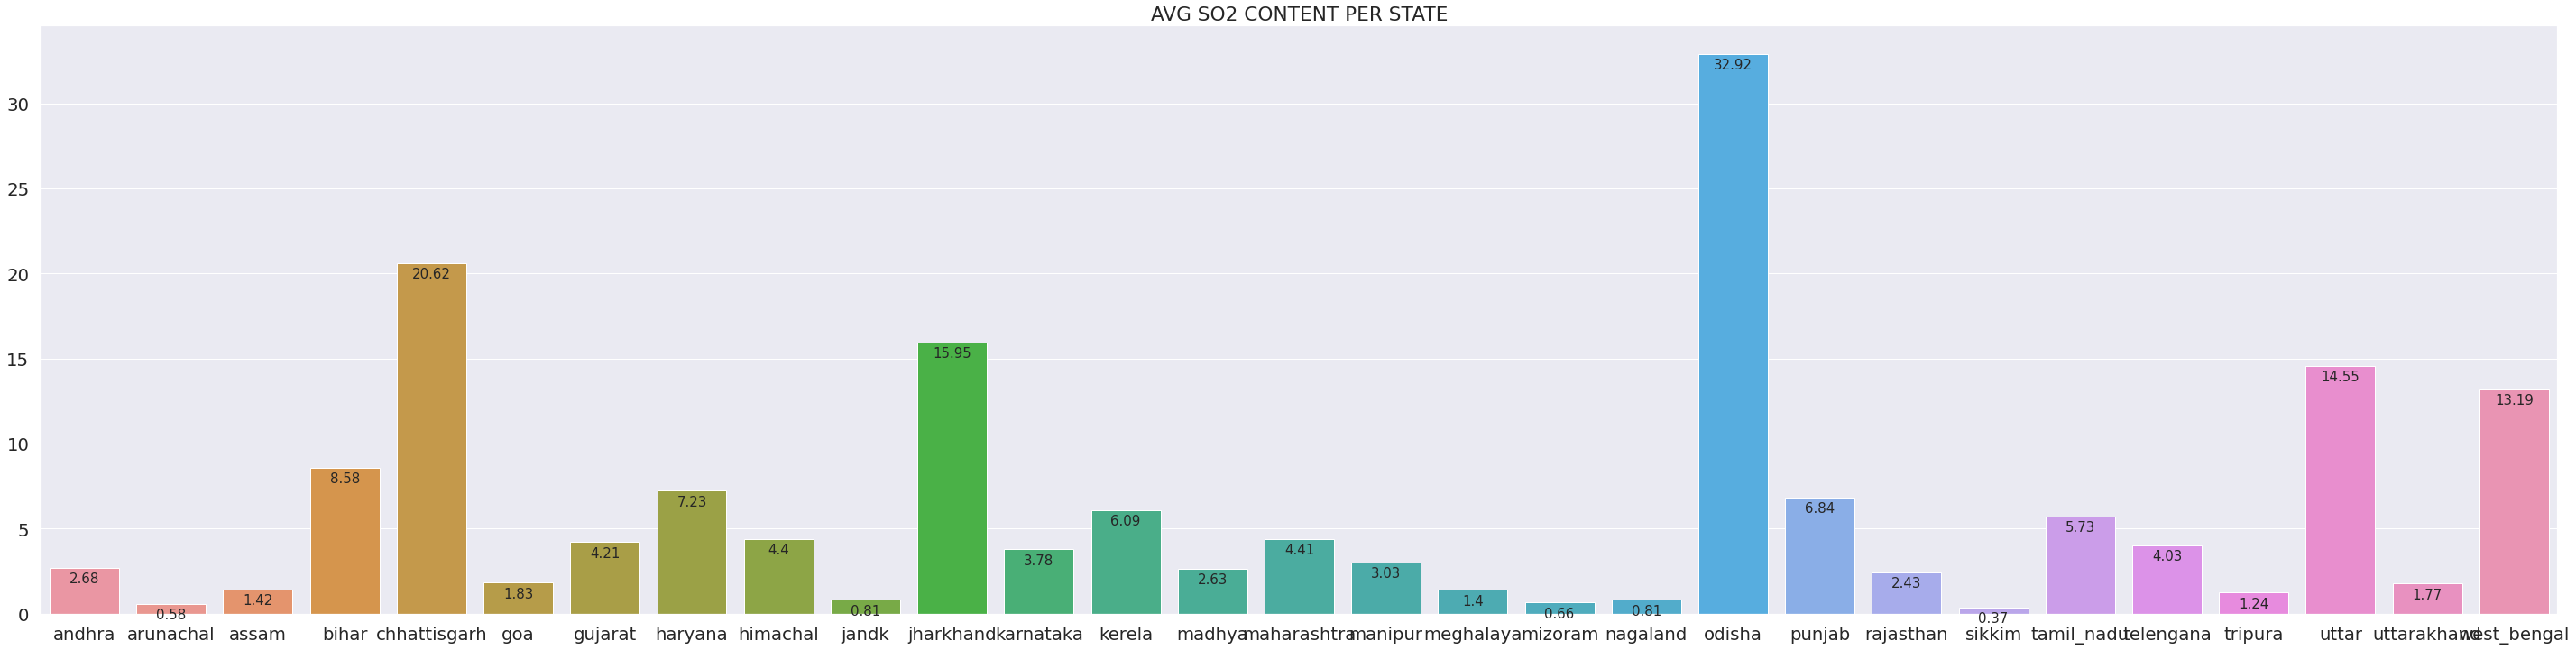

In [72]:
# AVG SO2 CONTENT PER STATE
# AVG aqi per state
states=aqi_data.groupby('state')['so2'].mean().reset_index()['state'].values
avg_aqi=aqi_data.groupby('state')['so2'].mean().reset_index()['so2'].values
plt.figure(figsize=(50,12))
sns.set(font_scale = 1.8)
plt.title('AVG SO2 CONTENT PER STATE')
plot=sns.barplot(x=states,y=avg_aqi)
for p in plot.patches:
    plot.annotate(format(round(p.get_height(),ndigits=2)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()


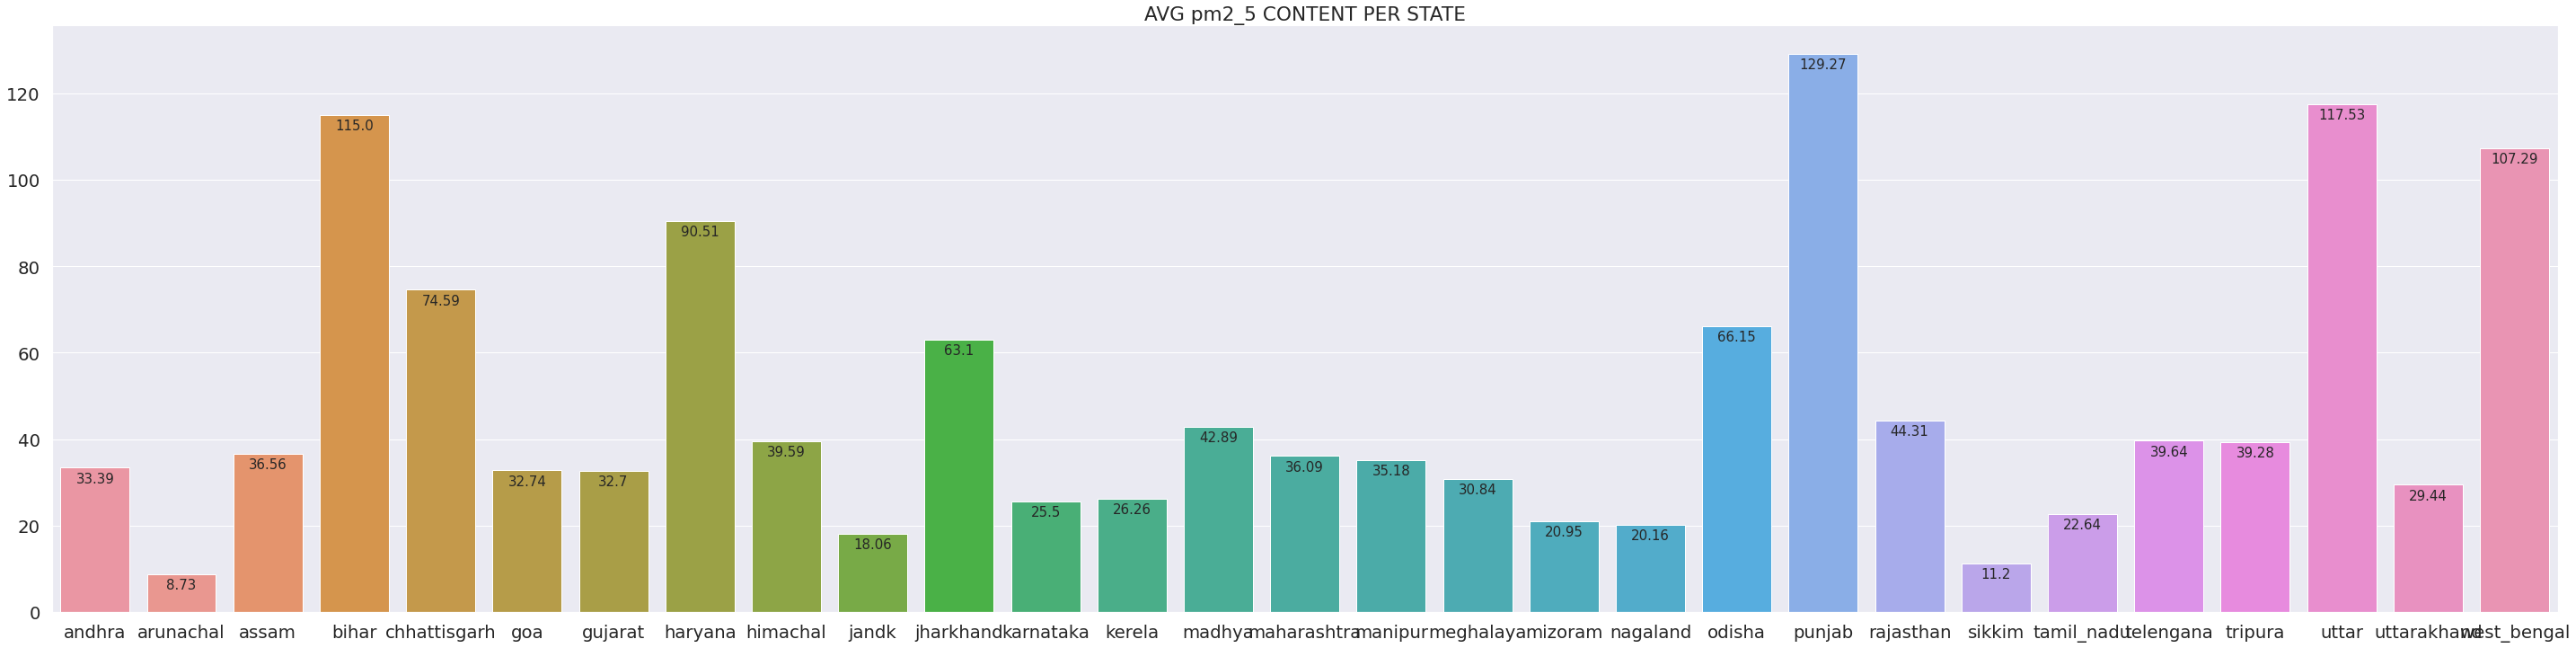

In [73]:
# AVG pm2_5 CONTENT PER STATE
# AVG aqi per state
states=aqi_data.groupby('state')['pm2_5'].mean().reset_index()['state'].values
avg_aqi=aqi_data.groupby('state')['pm2_5'].mean().reset_index()['pm2_5'].values
plt.figure(figsize=(50,12))
sns.set(font_scale = 1.8)
plt.title('AVG pm2_5 CONTENT PER STATE')
plot=sns.barplot(x=states,y=avg_aqi)
for p in plot.patches:
    plot.annotate(format(round(p.get_height(),ndigits=2)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()


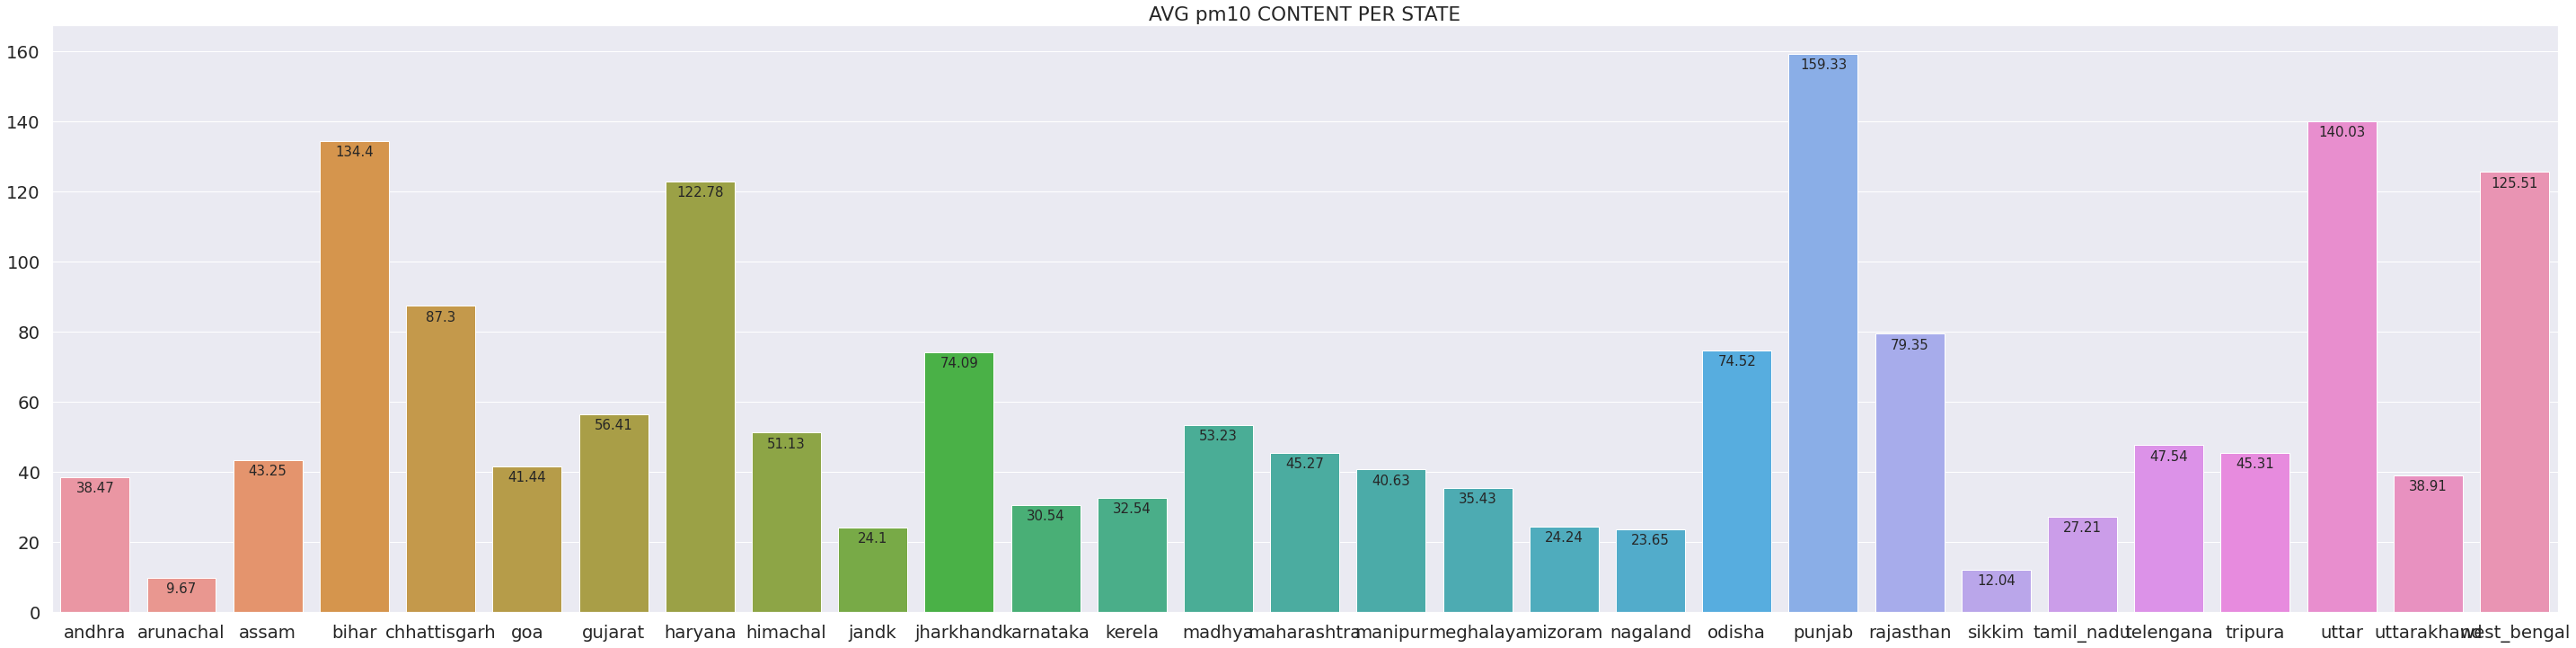

In [74]:
# AVG pm10 CONTENT PER STATE
# AVG aqi per state
states=aqi_data.groupby('state')['pm10'].mean().reset_index()['state'].values
avg_aqi=aqi_data.groupby('state')['pm10'].mean().reset_index()['pm10'].values
plt.figure(figsize=(50,12))
sns.set(font_scale = 1.8)
plt.title('AVG pm10 CONTENT PER STATE')
plot=sns.barplot(x=states,y=avg_aqi)
for p in plot.patches:
    plot.annotate(format(round(p.get_height(),ndigits=2)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()


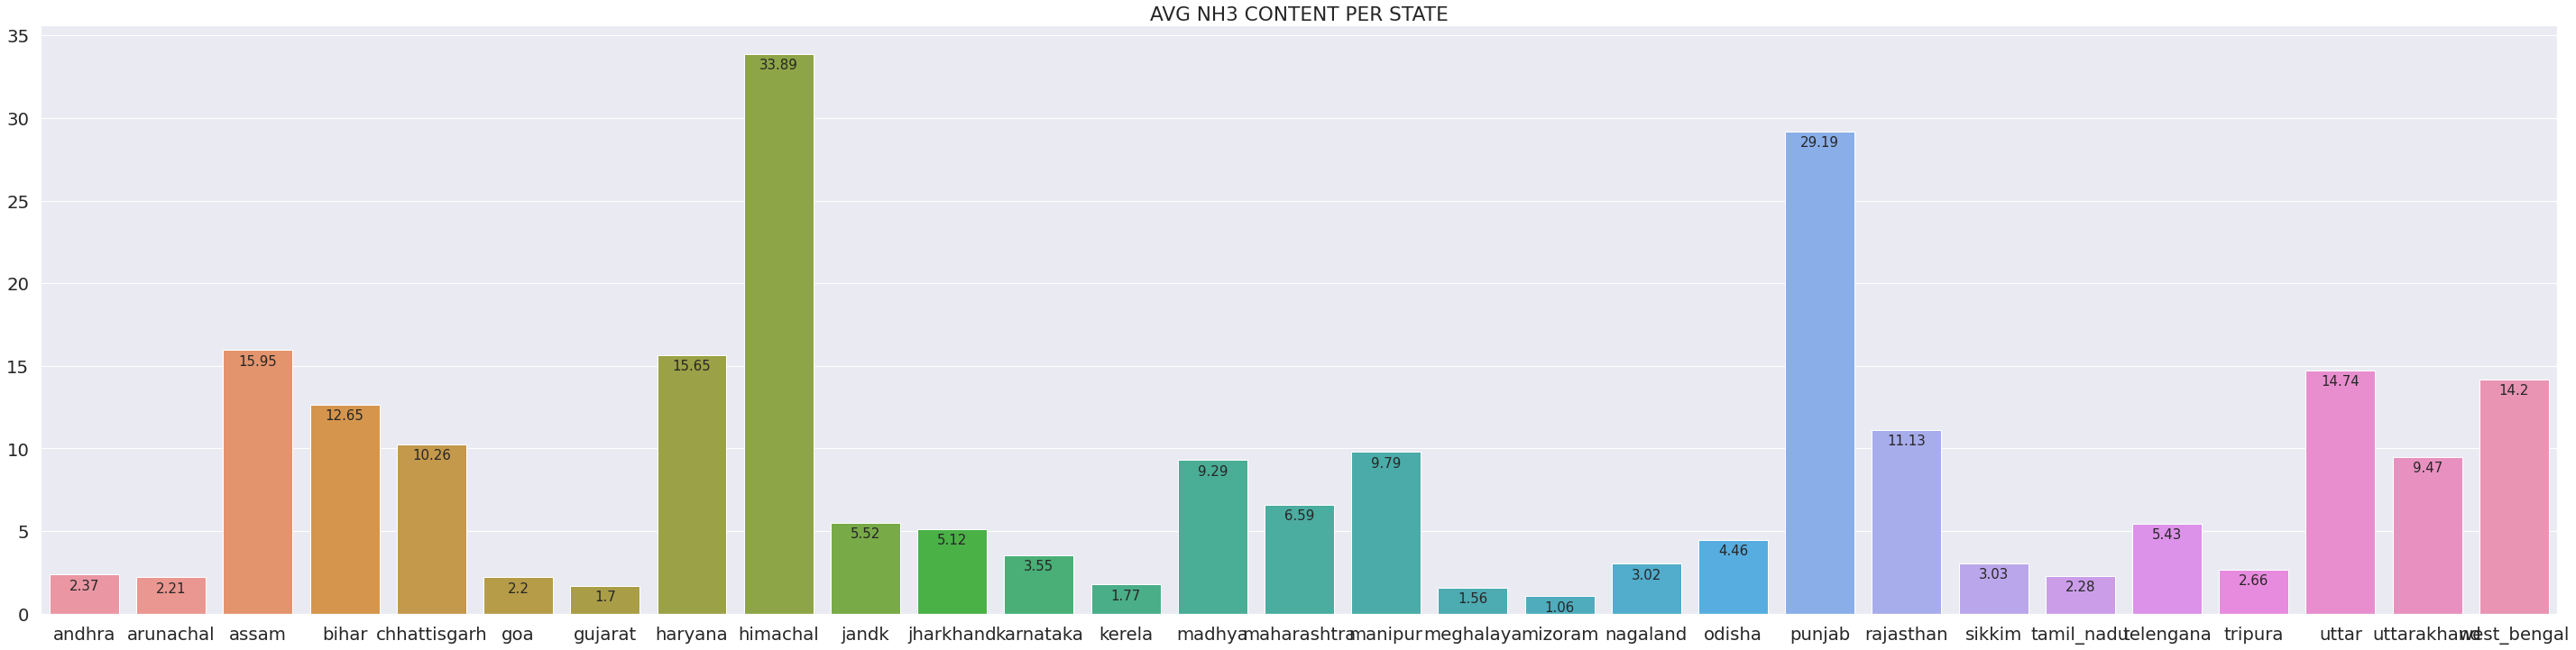

In [75]:
# AVG NH3 CONTENT PER STATE
# AVG aqi per state
states=aqi_data.groupby('state')['nh3'].mean().reset_index()['state'].values
avg_aqi=aqi_data.groupby('state')['nh3'].mean().reset_index()['nh3'].values
plt.figure(figsize=(50,12))
sns.set(font_scale = 1.8)
plt.title('AVG NH3 CONTENT PER STATE')
plot=sns.barplot(x=states,y=avg_aqi)
for p in plot.patches:
    plot.annotate(format(round(p.get_height(),ndigits=2)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()


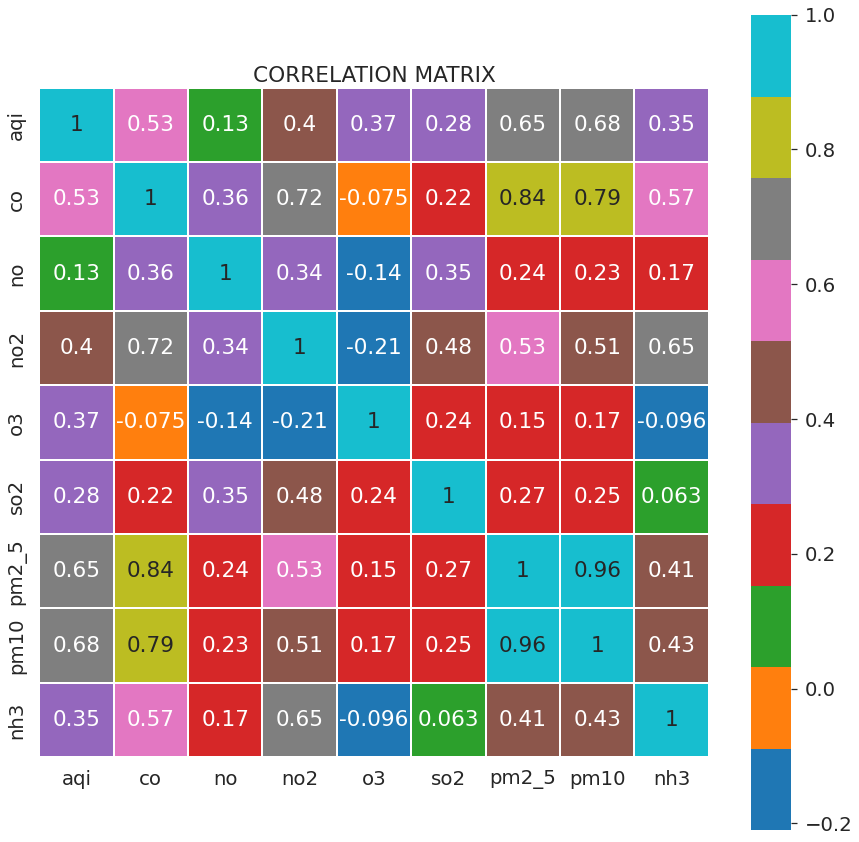

In [87]:
#HEATMAP
plt.figure(figsize=(15,15))
plt.title('CORRELATION MATRIX')
sns.heatmap(aqi_data.corr(), linewidth=1, linecolor='w', annot=True,square=True,cmap="tab10")
plt.show()